In [1]:
# Setting paths
import sys,os
import pathlib
sys.path.insert(0,os.path.expanduser('~/caryocar'))
sys.path.insert(0,os.path.abspath('..'))

In [2]:
# Building the networks from data
from setupmodels import *

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib as mpl
import seaborn as sns
import scipy as scp 
import powerlaw

import matplotlib.pyplot as plt

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn-paper')
sns.set_color_codes('deep')

%matplotlib inline

In [373]:
def linearBinning(g, num_bins, density=False):
    k_vals = [ kval for kval in dict(g.degree()).values() if kval>0 ]
    max_k, min_k = max(k_vals)+1, min(k_vals)
    
    bins = np.logspace(start=np.log10(min_k),stop=np.log10(max_k),num=num_bins)
    y,x = np.histogram(k_vals, bins=bins, density=density)
    
    return x,y

In [351]:
cwn

In [374]:
linearBinning(cwn,15)

(array([  1.        ,   1.46951688,   2.15947987,   3.17339212,
          4.66335329,   6.85287639,  10.07041754,  14.79864859,
         21.74686393,  31.95738367,  46.9619148 ,  69.01132661,
        101.41330949, 149.02857034, 219.        ]),
 array([1000,  848,  675,  404,  406,  357,  147,  121,   68,   40,   16,
           9,    3,    1]))

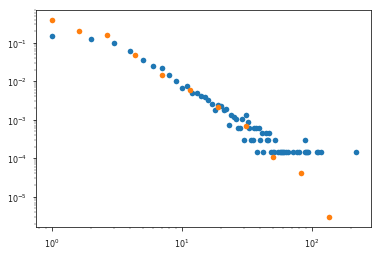

In [375]:
x,y = linearBinning(cwn,12,density=True)
#x_lin, y_lin = zip(*list(filter(lambda x: x[1]>0, zip(range(len(nx.degree_histogram(cwn))),nx.degree_histogram(cwn))))[1:])
#plt.plot( x_lin,y_lin, marker='o',ls='')

# plot linear binning
linBin_n = nx.degree_histogram(cwn)
linBin_k = range(len(linBin_n))
x_lin,y_lin = zip(*[ (k,v) for k,v in list(zip(linBin_k,list(map(lambda n: n/sum(linBin_n), linBin_n)))) if v>0 ])
plt.plot(x_lin,y_lin,marker='o',ls='')

plt.plot(x[:-1],y,marker='o',ls='')

plt.yscale('log')
plt.xscale('log')

In [143]:
k_vals = [ kval for kval in dict(cwn.degree()).values() if kval>0 ]

In [328]:
num_bins = 12
max_k, min_k = max(k_vals)+1, min(k_vals)
min_k = 9e-1

bins = np.logspace(start=np.log10(min_k),stop=np.log10(max_k),num=num_bins)
y,x = np.histogram(k_vals,bins=bins, density=False)

In [329]:
x,y

(array([  0.9       ,   1.48309827,   2.44397831,   4.0274    ,
          6.63669996,  10.93653136,  18.02216749,  29.6984949 ,
         48.93976266,  80.647197  , 132.89746477, 219.        ]),
 array([1000,  848, 1079,  406,  357,  225,  100,   55,   15,    9,    1]))

In [330]:
bins_sizes = [ x[i+1]-x[i] for i in range(len(x)-1) ]
y_new = y/np.array(bins_sizes)

In [331]:
x_lin, y_lin = zip(*list(filter(lambda x: x[1]>0, zip(range(len(nx.degree_histogram(cwn))),nx.degree_histogram(cwn))))[1:])

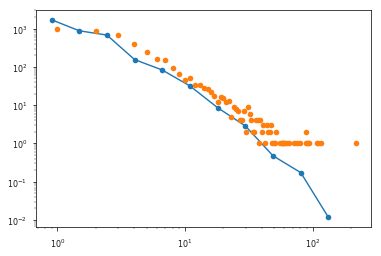

In [333]:
plt.plot(x[:-1],y_new, marker='o')

x_lin, y_lin = zip(*list(filter(lambda x: x[1]>0, zip(range(len(nx.degree_histogram(cwn))),nx.degree_histogram(cwn))))[1:])
plt.plot( x_lin,y_lin, marker='o',ls='')

plt.xscale('log')
plt.yscale('log')

In [334]:
fit = powerlaw.Fit(k_vals)

Calculating best minimal value for power law fit
/home/pedro/anaconda3/envs/tese_lncc/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


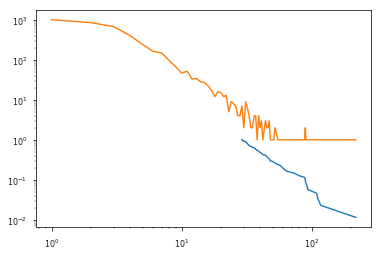

In [342]:
fit.plot_ccdf()
plt.plot(x_lin,y_lin)

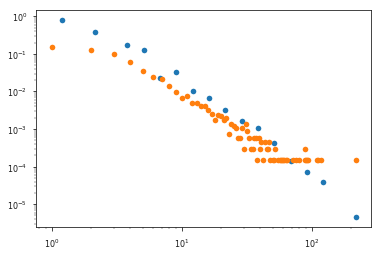

In [317]:
# plot log binning
y,x = np.histogram(k_vals,bins=bins, density=True)
plt.plot(x[1:],y, marker='o', ls='')

# plot linear binning
linBin_n = nx.degree_histogram(cwn)
linBin_k = range(len(linBin_n))
x_lin,y_lin = zip(*[ (k,v) for k,v in list(zip(linBin_k,list(map(lambda n: n/sum(linBin_n), linBin_n)))) if v>0 ])
plt.plot(x_lin,y_lin,marker='o',ls='')


plt.yscale('log')
plt.xscale('log')

In [114]:
x,y

(array([  1.        ,   1.81990763,   3.31206379,   6.02765016,
         10.96976653,  19.96396181,  36.33256645,  66.12191495,
        120.33577762, 219.        ]),
 array([2.97838726e-01, 2.49248023e-01, 7.28395899e-02, 1.76401122e-02,
        6.54336013e-03, 1.68582651e-03, 3.11507628e-04, 5.40526498e-05,
        2.47506379e-06]))

In [74]:
sum(y)

0.6472961171997405

In [18]:
np.histogram(k_vals)

(array([3971,   91,   20,    3,    7,    2,    0,    0,    0,    1]),
 array([  1. ,  22.7,  44.4,  66.1,  87.8, 109.5, 131.2, 152.9, 174.6,
        196.3, 218. ]))